In [ ]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.3 MB/s eta 0:00:00


In [ ]:
from pgmpy.estimators import *
from pgmpy.models import BayesianNetwork

In [ ]:
from pgmpy.inference import VariableElimination

In [ ]:
#importing necessary libraries...
import os,sys,io,math
from re import *
from math import *
from array import *
from heapq import *
from numpy import *
from bisect import *
from pandas import *
from sklearn import *
from functools import *
from itertools import *
from statistics import *
from matplotlib import *
from collections import *
from sklearn.cluster import *
from sklearn.mixture import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *
from sklearn.model_selection import *
from sklearn.feature_extraction.text import *


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Petal width')

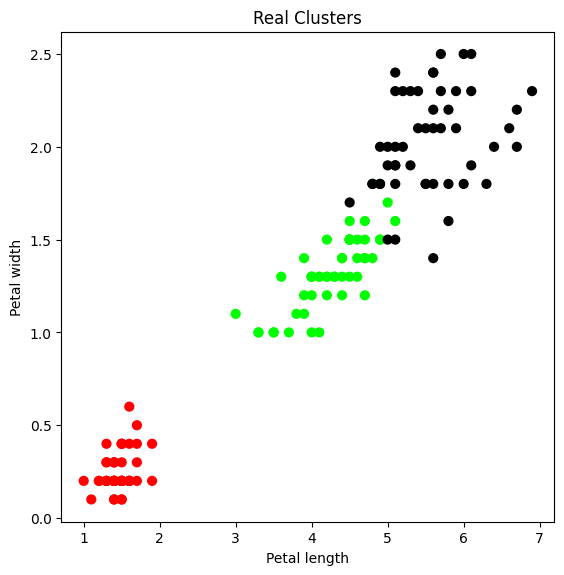

In [ ]:
#8. Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using K-Means algorithm.
# Compare the results of these two algorithms and comment on the quality of clustering.

import matplotlib.pyplot as plt
from pandas import DataFrame
#importing iris data to perform...
iris=datasets.load_iris()
x=DataFrame(iris.data)
x.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=DataFrame(iris.target)
y.columns=['Targets']


#build k-Means model...
d=KMeans(n_clusters=3)
d.fit(x)

#now visualise the clustering results...
plt.figure(figsize=(14,14))
cmap=array(['red','lime','black'])


#now plot for the original classifications using petal features...
plt.subplot(2,2,1)
plt.scatter(x.Petal_Length,x.Petal_Width,c=cmap[y.Targets],s=40)
plt.title('Real Clusters')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

#now plot the model classifications..


Text(0, 0.5, 'Petal width')

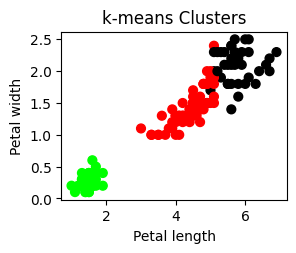

In [ ]:
plt.subplot(2,2,2)
plt.scatter(x.Petal_Length,x.Petal_Width,c=cmap[d.labels_],s=40)
plt.title('k-means Clusters')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

Observation: The GMM using EM algo based clustering method the true labels are more closely than the KMeans!!!


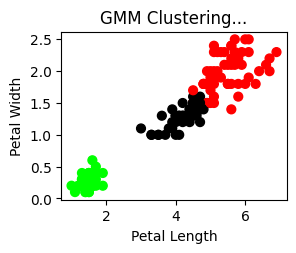

In [ ]:
#8th continution...

s=preprocessing.StandardScaler()
s.fit(x)
xsa=s.transform(x)
xs=DataFrame(xsa,columns=x.columns)

gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
gmmy=gmm.predict(xs)
plt.subplot(2,2,3)
plt.scatter(x.Petal_Length,x.Petal_Width,c=cmap[gmmy],s=40)
plt.title("GMM Clustering...")
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
print("Observation: The GMM using EM algo based clustering method the true labels are more closely than the KMeans!!!")

In [ ]:
#9.  Write a program to implement k-Nearest Neighbor algorithm to classify the iris data set.
#    Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.

d=datasets.load_iris()
xtr,xte,ytr,yte=train_test_split(d.data,d.target,test_size=0.1)

for i in range(len(d.target_names)):
  print("Label",i,"-",str(d.target_names[i]))

#create obj of KNN classifier...
classifier=KNeighborsClassifier(n_neighbors=1)

#performing training...
classifier.fit(xtr,ytr)
y_pred=classifier.predict(xte)

#now display results...
print("\nResults of classification using KNN with k=1:")
for r in range(len(xte)):
  print("Sample:",str(xte[r])," Actual label:",str(yte[r])," Predicted label:",str(y_pred[r]))
print("\nClassification Accuracy:",classifier.score(xte,yte))

print("\nConfusion matrix:\n",metrics.confusion_matrix(yte,y_pred))
print("\nAccuracy metrics:\n",metrics.classification_report(yte,y_pred))

Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica

Results of classification using KNN with k=1:
Sample: [4.5 2.3 1.3 0.3]  Actual label: 0  Predicted label: 0
Sample: [4.9 2.5 4.5 1.7]  Actual label: 2  Predicted label: 1
Sample: [5.2 4.1 1.5 0.1]  Actual label: 0  Predicted label: 0
Sample: [7.2 3.6 6.1 2.5]  Actual label: 2  Predicted label: 2
Sample: [5.1 3.5 1.4 0.3]  Actual label: 0  Predicted label: 0
Sample: [5.4 3.9 1.3 0.4]  Actual label: 0  Predicted label: 0
Sample: [5.1 2.5 3.  1.1]  Actual label: 1  Predicted label: 1
Sample: [5.8 2.7 5.1 1.9]  Actual label: 2  Predicted label: 2
Sample: [5.8 2.7 3.9 1.2]  Actual label: 1  Predicted label: 1
Sample: [6.4 2.8 5.6 2.2]  Actual label: 2  Predicted label: 2
Sample: [6.3 2.7 4.9 1.8]  Actual label: 2  Predicted label: 2
Sample: [5.1 3.7 1.5 0.4]  Actual label: 0  Predicted label: 0
Sample: [6.4 3.2 5.3 2.3]  Actual label: 2  Predicted label: 2
Sample: [6.9 3.1 4.9 1.5]  Actual label: 1  Predicted label: 1
Sample: [5.4 

(244, 2)


<ipython-input-19-def445d855dc>:12: RuntimeWarning: invalid value encountered in true_divide
  w[i,i]=exp(d*d.T/(-2.0*k**2))
<ipython-input-19-def445d855dc>:12: RuntimeWarning: divide by zero encountered in true_divide
  w[i,i]=exp(d*d.T/(-2.0*k**2))


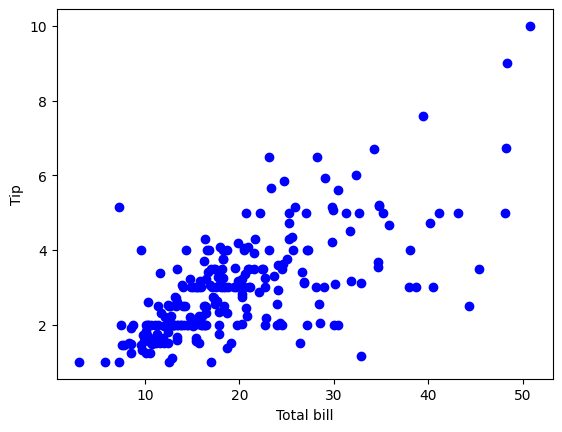

In [ ]:
#10. Implement the non-parametric Locally Weighted Regression algorithm in order
#    to fit data points. Select appropriate data set your experiment and draw graphs.


import matplotlib.pyplot as plt
#kernel smoothing function...
def kernel(p,xmat,k):
  m,n=shape(xmat)
  w=mat(eye(m))
  for i in range(m):
    d=p-x[i]
    w[i,i]=exp(d*d.T/(-2.0*k**2))
  return w

#function to return local wieght of each training example...
def local(p,xmat,ymat,k):
  wt=kernel(p,xmat,k)
  w=(x.T*(wt*x)).I*(x.T*wt*ymat.T)
  return w

#root function that drives algo...
def lwr(xmat,ymat,k):
  m,n=shape(xmat)
  yp=zeros(m)
  for i in range(m):
    yp[i]=xmat[i]*local(xmat[i],xmat,ymat,k)
  return yp

d=read_csv("/content/10-dataset.csv")
ca,cb=array(d.total_bill),array(d.tip)
mca,mcb=mat(ca),mat(cb)
m=shape(mcb)[1]
o=ones((1,m),dtype=int)

#horizontal stacking...
x=hstack((o.T,mca.T))
print(x.shape)

#predicting values using LWLR...
ypred=lwr(x,mcb,0.0)

#plotting the predicted graph...
xs=x.copy()
xs.sort(axis=0)
plt.scatter(ca,cb,color='blue')
plt.plot(xs[:,1],ypred[x[:,1].argsort(0)],color='yellow',linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()